# SVM ML LAB

### Zaidan Mufaddhal | AIU20092029

##  1. Data Preprocessing

In [257]:
# importing libraries  
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 
import matplotlib.pyplot as plt

In [258]:
#importing datasets  
df = pd.read_csv('Downloads/MSFT_forSVM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,04/06/2022,305.190002,307.000000,296.709991,299.500000,299.500000,40110400
1,04/07/2022,296.660004,303.649994,296.350006,301.369995,301.369995,31411200
2,04/08/2022,300.440002,301.119995,296.279999,296.970001,296.970001,24361900
3,04/11/2022,291.790009,292.609985,285.000000,285.260010,285.260010,34569300
4,04/12/2022,289.239990,290.739990,280.489990,282.059998,282.059998,30966700
5,04/13/2022,282.730011,288.579987,281.299988,287.619995,287.619995,21907200
6,04/14/2022,288.089996,288.309998,279.320007,279.829987,279.829987,28221600
7,04/18/2022,278.910004,282.459991,278.339996,280.519989,280.519989,20778000
8,04/19/2022,279.380005,286.170013,278.410004,285.299988,285.299988,22297700
9,04/20/2022,289.399994,289.700012,285.369995,286.359985,286.359985,22906700


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       17 non-null     object 
 1   Open       17 non-null     float64
 2   High       17 non-null     float64
 3   Low        17 non-null     float64
 4   Close      17 non-null     float64
 5   Adj Close  17 non-null     float64
 6   Volume     17 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ KB


In [260]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01
mean,286.987059,290.478821,281.699998,284.761173,284.761173,3.251398e+07
std,8.367976,7.715607,8.170359,8.441240,8.441240,1.061507e+07
min,273.290009,278.359985,270.000000,270.220001,270.220001,2.077800e+07
25%,281.679993,286.170013,278.339996,280.519989,280.519989,2.436190e+07
50%,288.089996,289.880005,280.059998,283.220001,283.220001,3.096670e+07
75%,289.399994,292.609985,285.000000,287.619995,287.619995,3.567890e+07
max,305.190002,307.000000,296.709991,301.369995,301.369995,6.347770e+07


#### Get Independent and dependent data

In [261]:
#Create empty lists to store the independent and dependent data
days = list()
adj_close_prices = list()

In [262]:
#Get the dates and lists to store independent and dependent data
df_days = df.loc[:, 'Date']
df_adj_price = df.loc[:, 'Adj Close']

In [263]:
#Create the independent data set
for day in df_days:
    days.append( [int(day.split('/')[1])])
    
#Create the dependent data set
for adj_close_price in df_adj_price:
    adj_close_prices.append(float(adj_close_price))

In [264]:
x = days
y = adj_close_prices

In [294]:
x_train = df.loc[:, 'Date'].head(len(df)-6)


In [295]:
x_train

0      04/06/2022
1      04/07/2022
2      04/08/2022
3      04/11/2022
4      04/12/2022
5      04/13/2022
6      04/14/2022
7      04/18/2022
8      04/19/2022
9      04/20/2022
10     04/21/2022
Name: Date, dtype: object

In [286]:
# Splitting the dataset into training and test set.  
#from sklearn.model_selection import train_test_split  
#x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3) 

#feature Scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [296]:
x_train

0      04/06/2022
1      04/07/2022
2      04/08/2022
3      04/11/2022
4      04/12/2022
5      04/13/2022
6      04/14/2022
7      04/18/2022
8      04/19/2022
9      04/20/2022
10     04/21/2022
Name: Date, dtype: object

In [288]:
x_test

array([[ 0.09038538],
       [-0.40673422],
       [ 0.33894519],
       [ 0.9603447 ],
       [ 1.3331844 ],
       [-0.77957393]])

In [289]:
y_test

[280.519989, 279.829987, 286.359985, 280.720001, 289.630005, 285.26001]

In [290]:
y_train

[287.619995,
 296.970001,
 282.059998,
 299.5,
 270.220001,
 277.519989,
 280.809998,
 301.369995,
 283.220001,
 285.299988,
 274.029999]

In [291]:
y

[299.5,
 301.369995,
 296.970001,
 285.26001,
 282.059998,
 287.619995,
 279.829987,
 280.519989,
 285.299988,
 286.359985,
 280.809998,
 274.029999,
 280.720001,
 270.220001,
 283.220001,
 289.630005,
 277.519989]

## 2. Fitting the SVM classifier to the training set

In [270]:
from sklearn.svm import SVR # "Support vector classifier"  

In [271]:
classifier = SVR(kernel='rbf', C=1000.0, gamma=0.15) 

In [272]:
classifier.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.15)

## 3. Predicting the test set result

In [273]:
y_pred=classifier.predict(x_test)

In [274]:
y_test

[301.369995, 279.829987, 285.299988, 286.359985, 270.220001, 282.059998]

In [275]:
y_pred

array([298.10190565, 285.82623576, 279.85912197, 279.35717115,
       281.83330963, 289.29838498])

## 4. Creating the mean squared error

In [276]:
#Creating the Confusion matrix  
from sklearn.metrics import mean_squared_error
ms= mean_squared_error(y_test, y_pred)  

In [277]:
ms

52.090169227215135

So, based on the above result, there is 141+40=181 == 78.35% correct predictions and 34+16=50 == 21.64% incorrect predictions.

## 5. Visualizing the training set result

In [278]:
y_pred_rounded = np.round(y_pred)

In [279]:
y_pred_rounded

array([298., 286., 280., 279., 282., 289.])

In [280]:
y_pred_list = y_pred_rounded.tolist()

In [281]:
print(y_pred_list)

[298.0, 286.0, 280.0, 279.0, 282.0, 289.0]


In [282]:
y_predicted = y_train + y_pred_list

In [283]:
print (y_predicted)

[296.970001, 283.220001, 280.809998, 280.519989, 277.519989, 274.029999, 285.26001, 299.5, 287.619995, 289.630005, 280.720001, 298.0, 286.0, 280.0, 279.0, 282.0, 289.0]


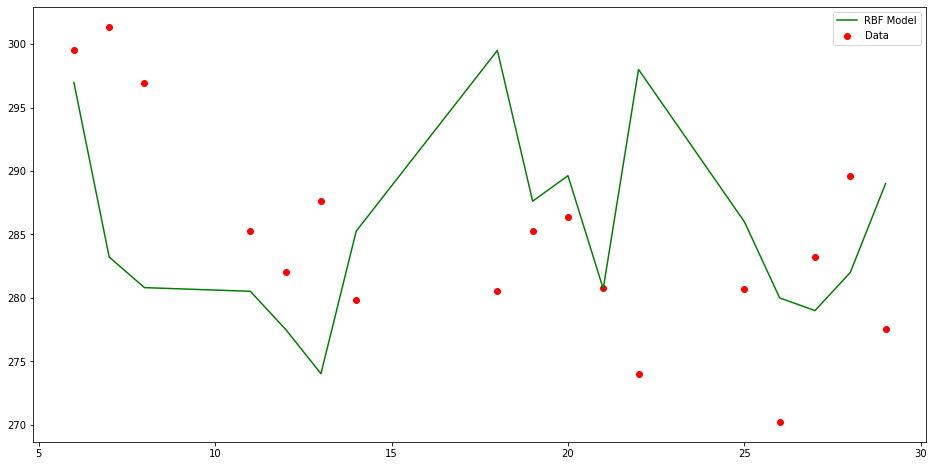

In [284]:
#plot the models ona graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_predicted, color='green', label='RBF Model')
plt.legend()
plt.show()

## 6. Visualizing the test set result